**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE:
1. Andrea Xcaret Gomez Alfaro
2. Jose de Jesus N. Zuniga Gonzalez
3. Emiliano Palafox Ruiz
4. Miguel Ángel Bustamante Pérez
* MATRÍCULA:
1. A01796384
2. A00669728
3. A01796609
4. A01781583


In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y analítica de datos"
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
os.chdir(DIR)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [87]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [88]:
data_df.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [89]:
data_df.nunique()

,0
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


Únicamente la variable **diagnosis** es una variable categórica.

1c) Búsqueda de valores faltantes.

In [90]:
percentage = (data_df.isnull().sum() / len(data_df)) * 100
missing_data_df = pd.DataFrame({
    '% de valores faltantes': percentage
})

print("\nPorcentaje de valores faltantes por columna:\n")
missing_data_df.head(18)


Porcentaje de valores faltantes por columna:



,% de valores faltantes
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0
symmetry_mean,0.0


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

([0, 1], [Text(0, 0, 'M'), Text(1, 0, 'B')])

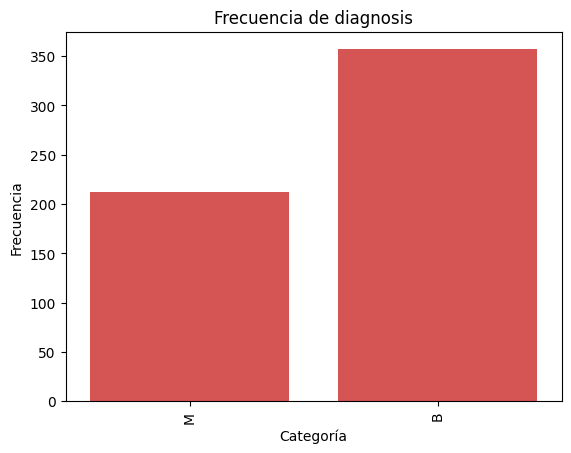

In [91]:
sns.countplot(x=data_df['diagnosis'], color="#E60E0E", alpha=0.8)
plt.title(f"Frecuencia de diagnosis")
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

Text(0.5, 1.0, 'Correlation Heatmap')

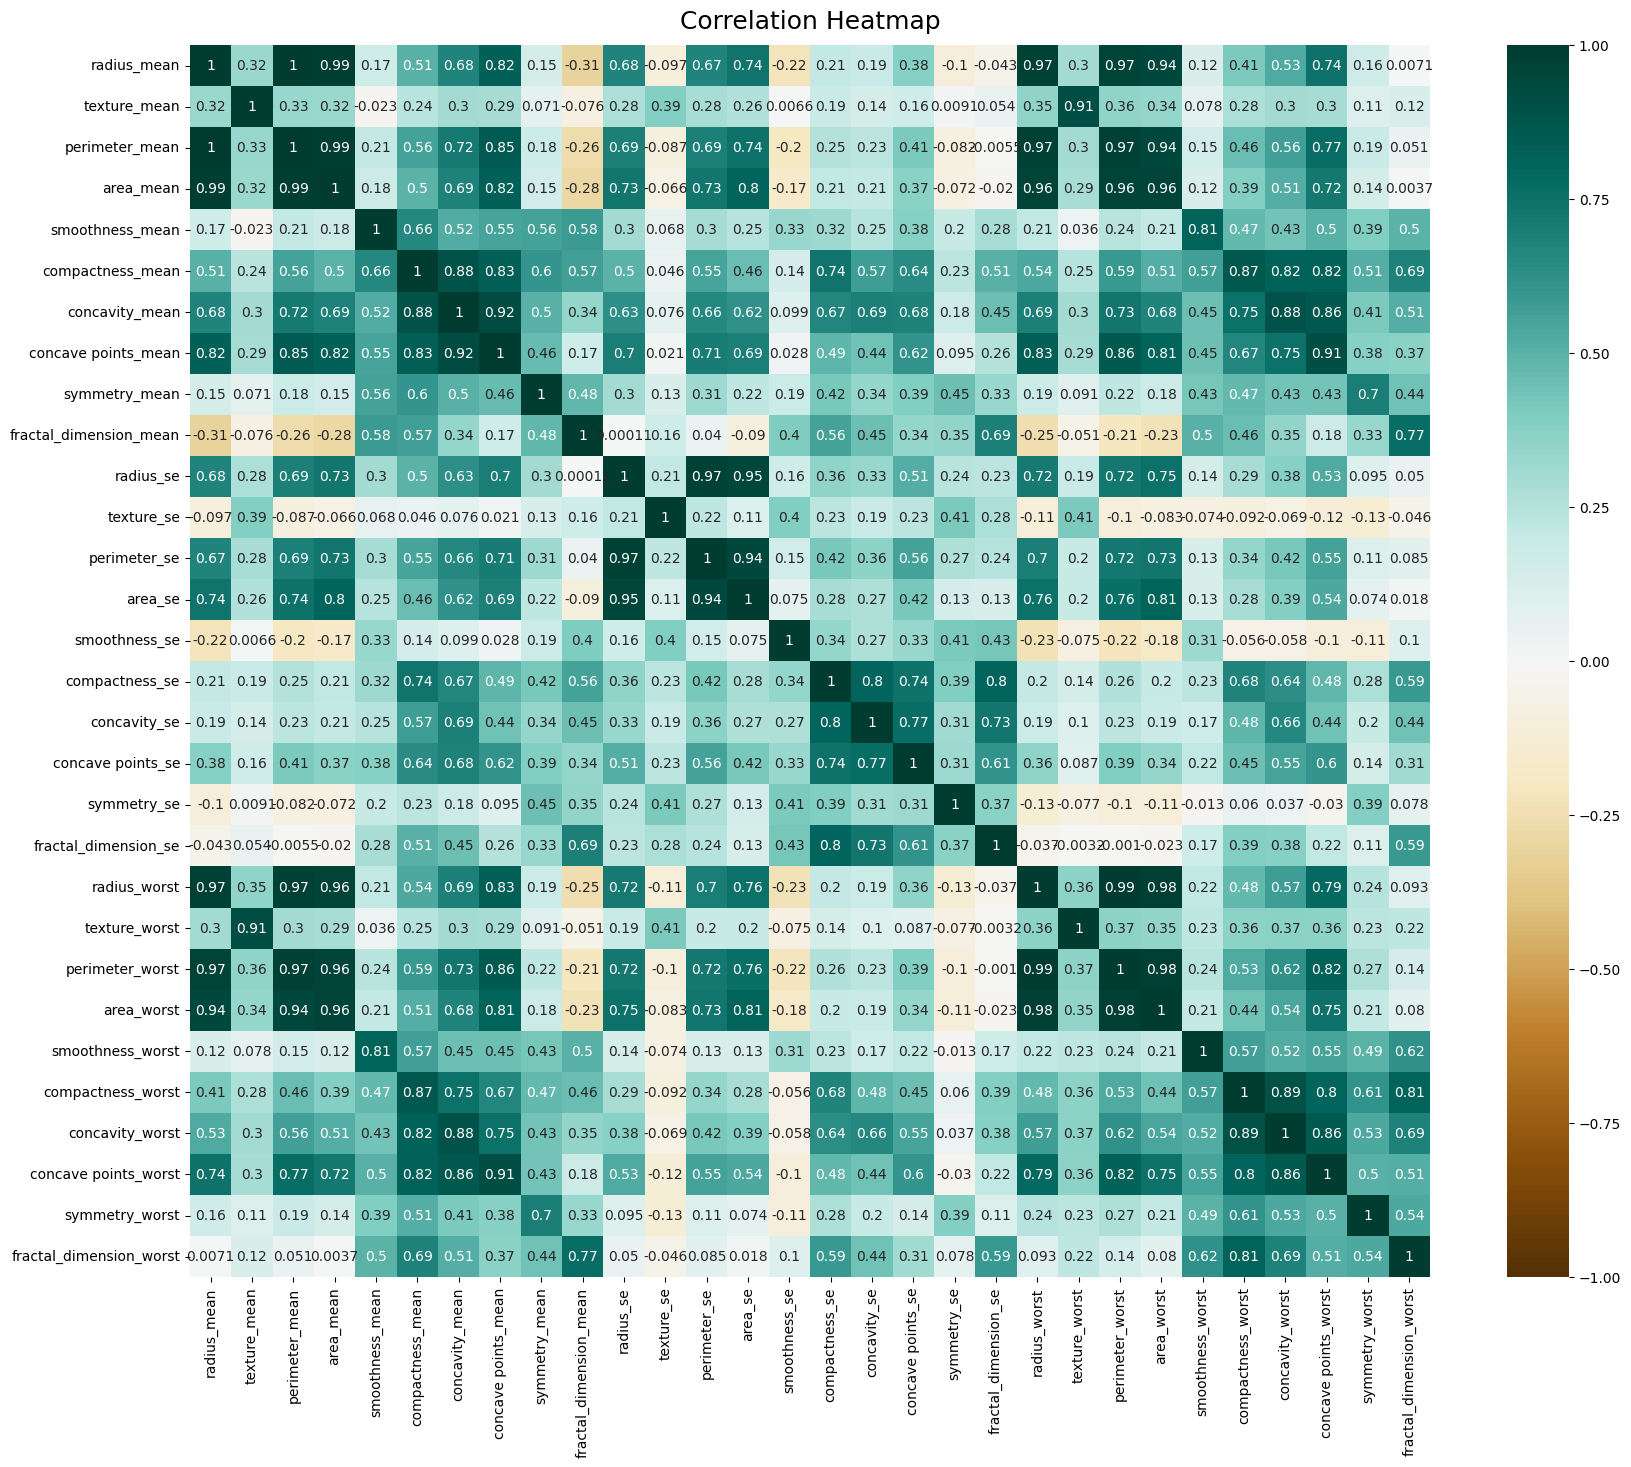

In [92]:
numeric_columns = data_df.select_dtypes(include=np.number)

plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

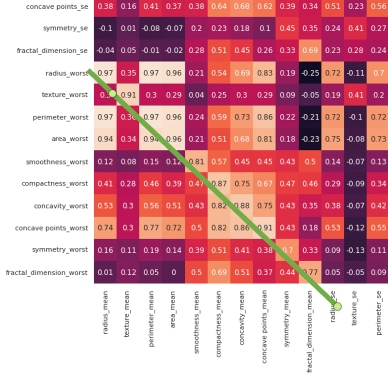

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [93]:
data_df_reduced= data_df.drop(columns=[col for col in data_df.columns if col.endswith('_worst')])

In [94]:
data_df_reduced.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




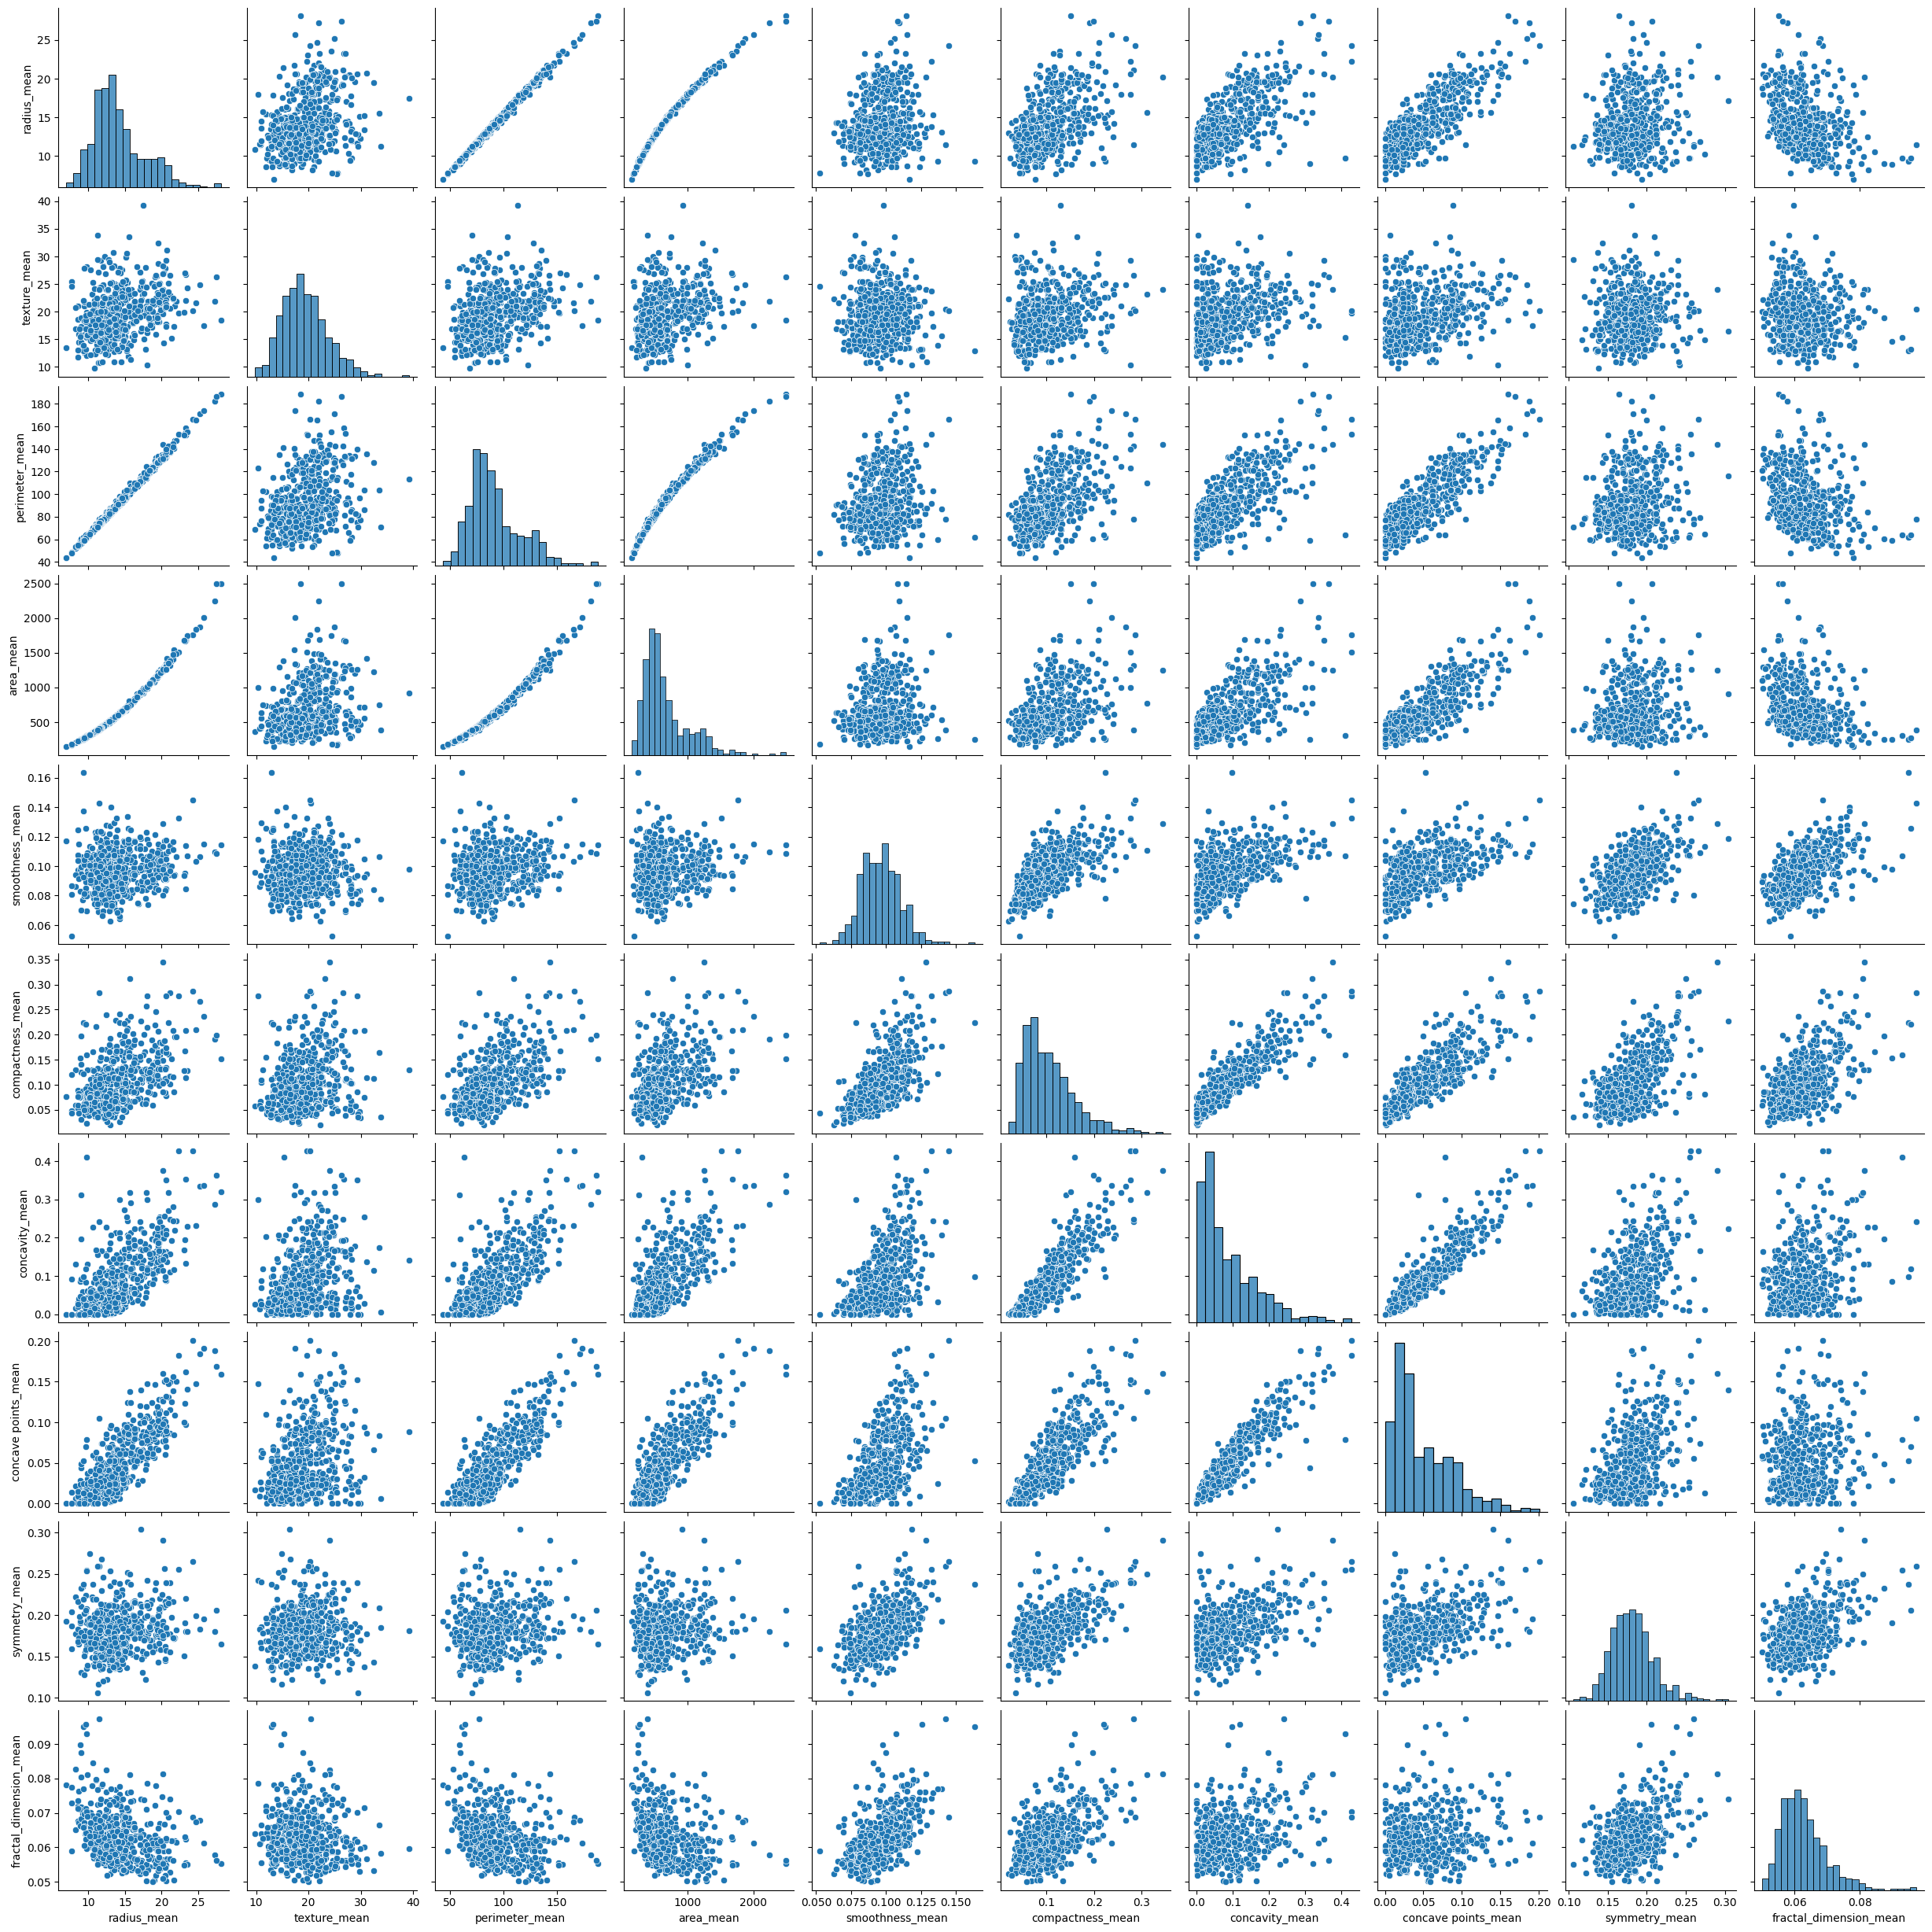

In [95]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


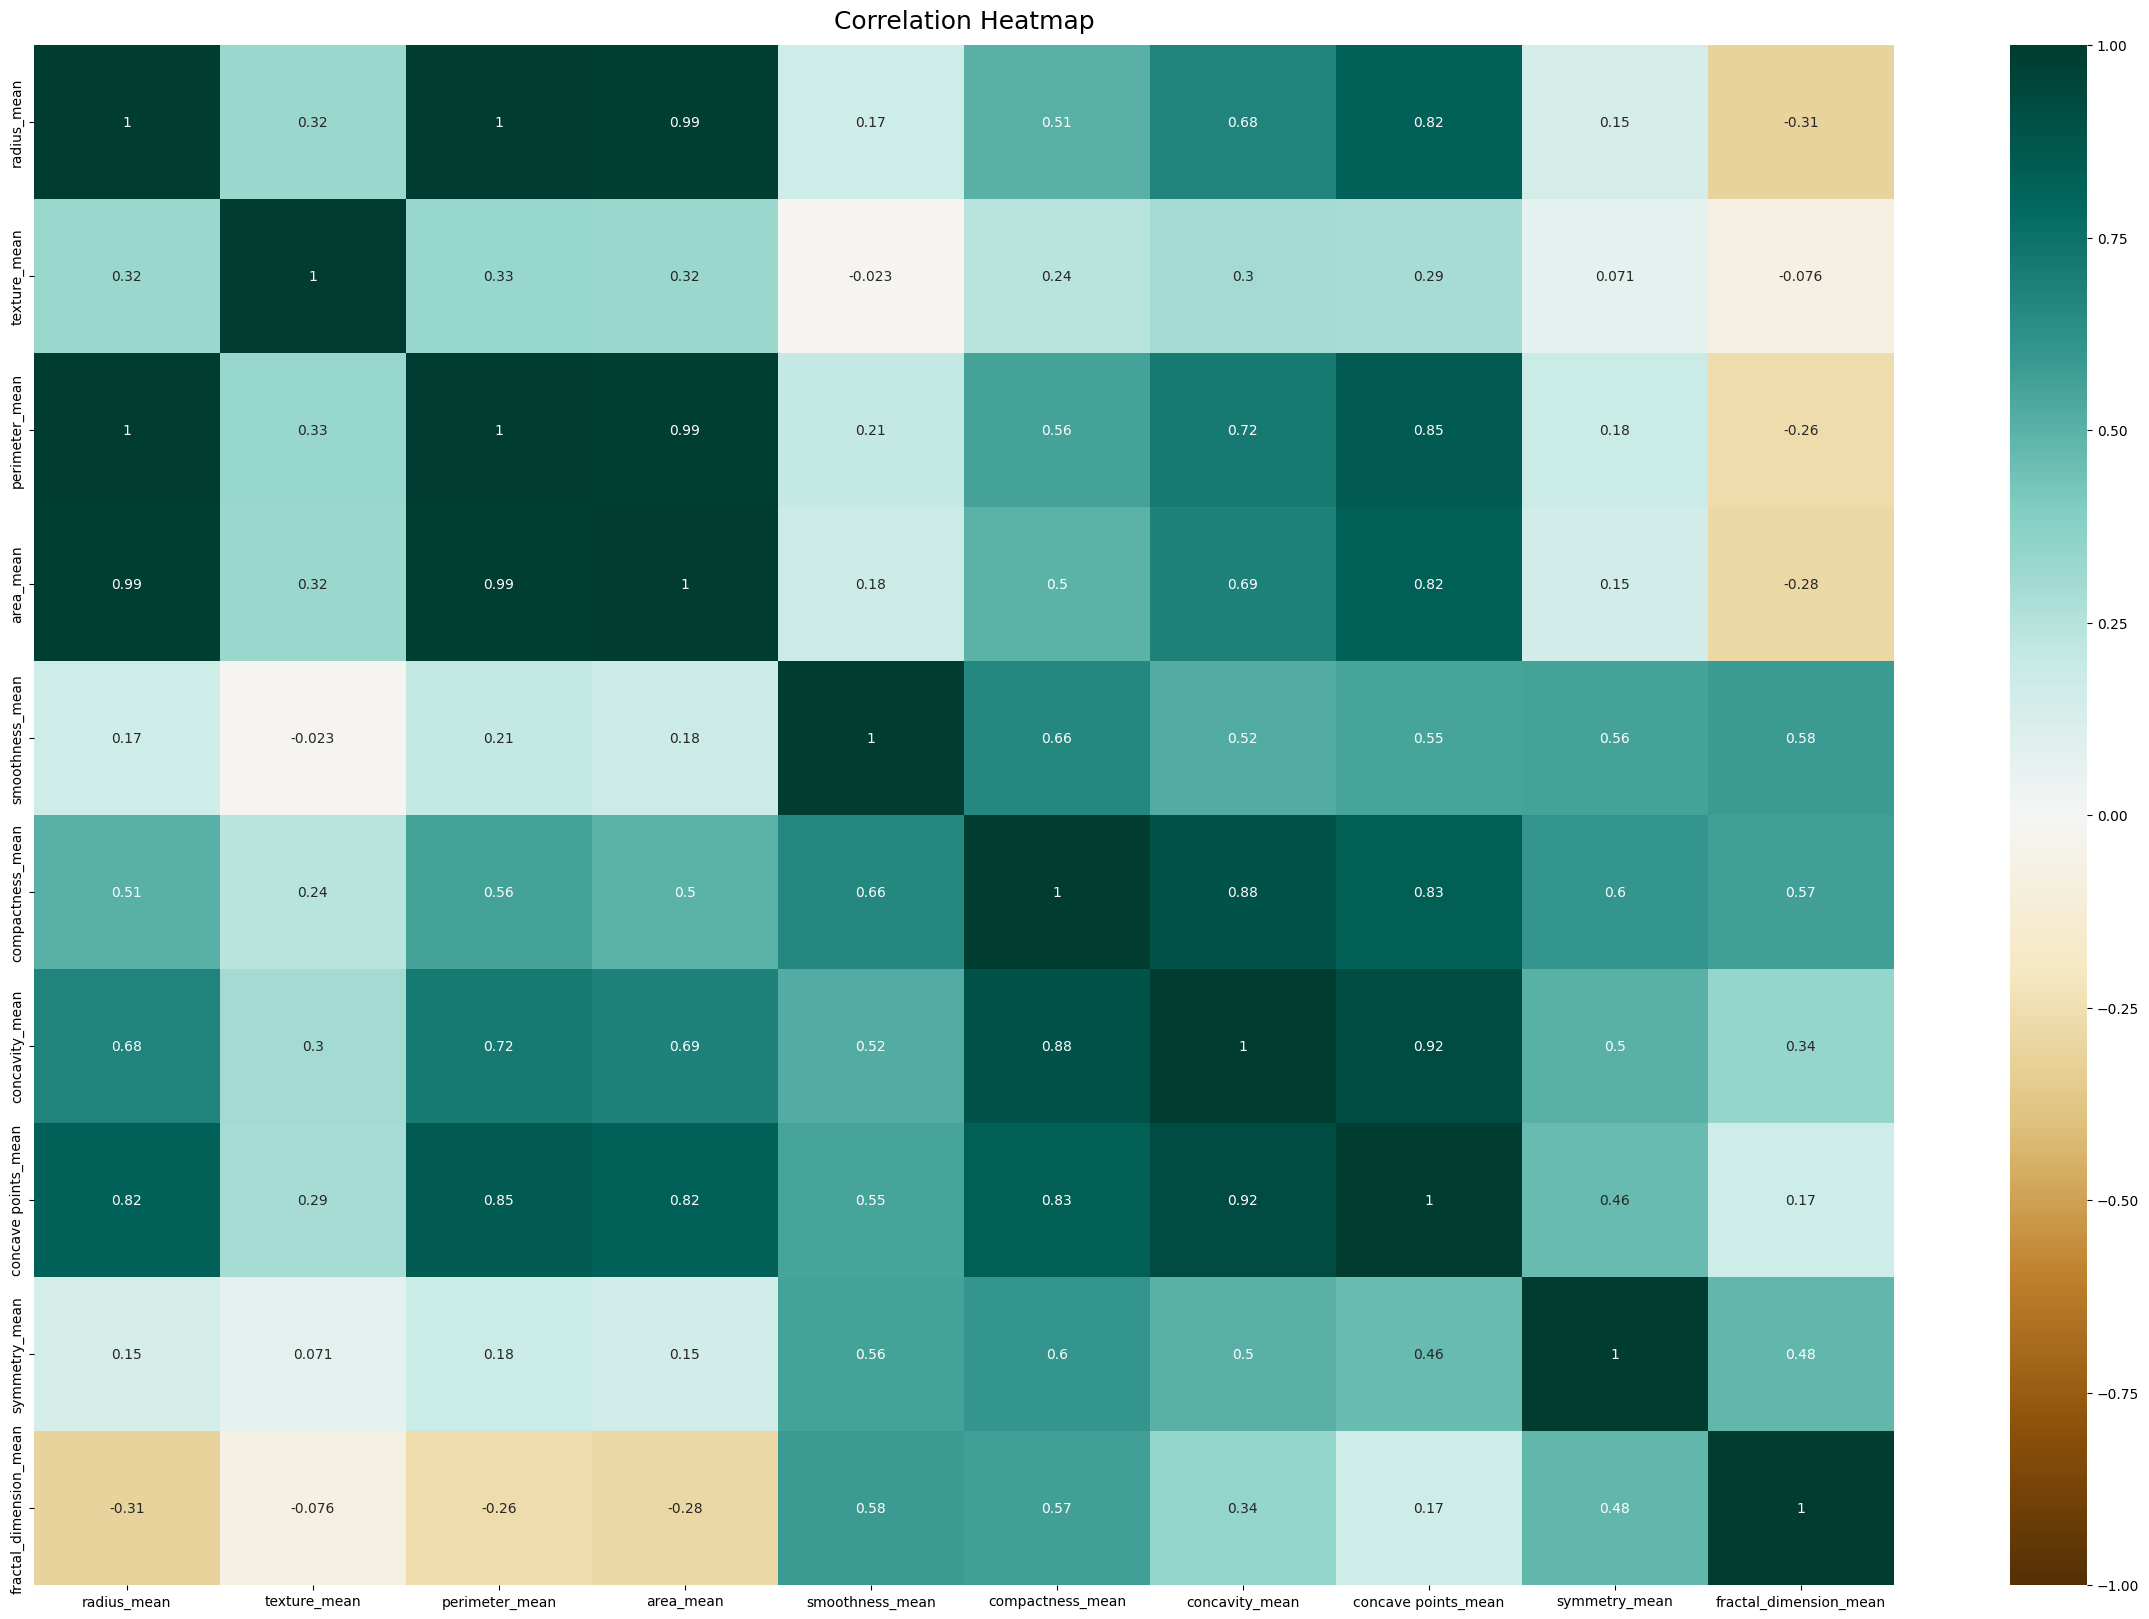

In [96]:
mean_columns = data_df_reduced[[col for col in data_df_reduced.columns if col.endswith('_mean')]]

plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(mean_columns.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.show()

In [97]:
data_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [98]:
columns_to_drop = [
    'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
    'perimeter_se', 'area_se', 'concavity_se', 'concave points_se'
]

data_df_reduced_2 = data_df_reduced.drop(columns=columns_to_drop)

In [99]:
data_df_reduced_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.2+ KB


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

In [100]:
numeric_data_2 = data_df_reduced_2.select_dtypes(include=np.number)
skew_values = numeric_data_2.skew()

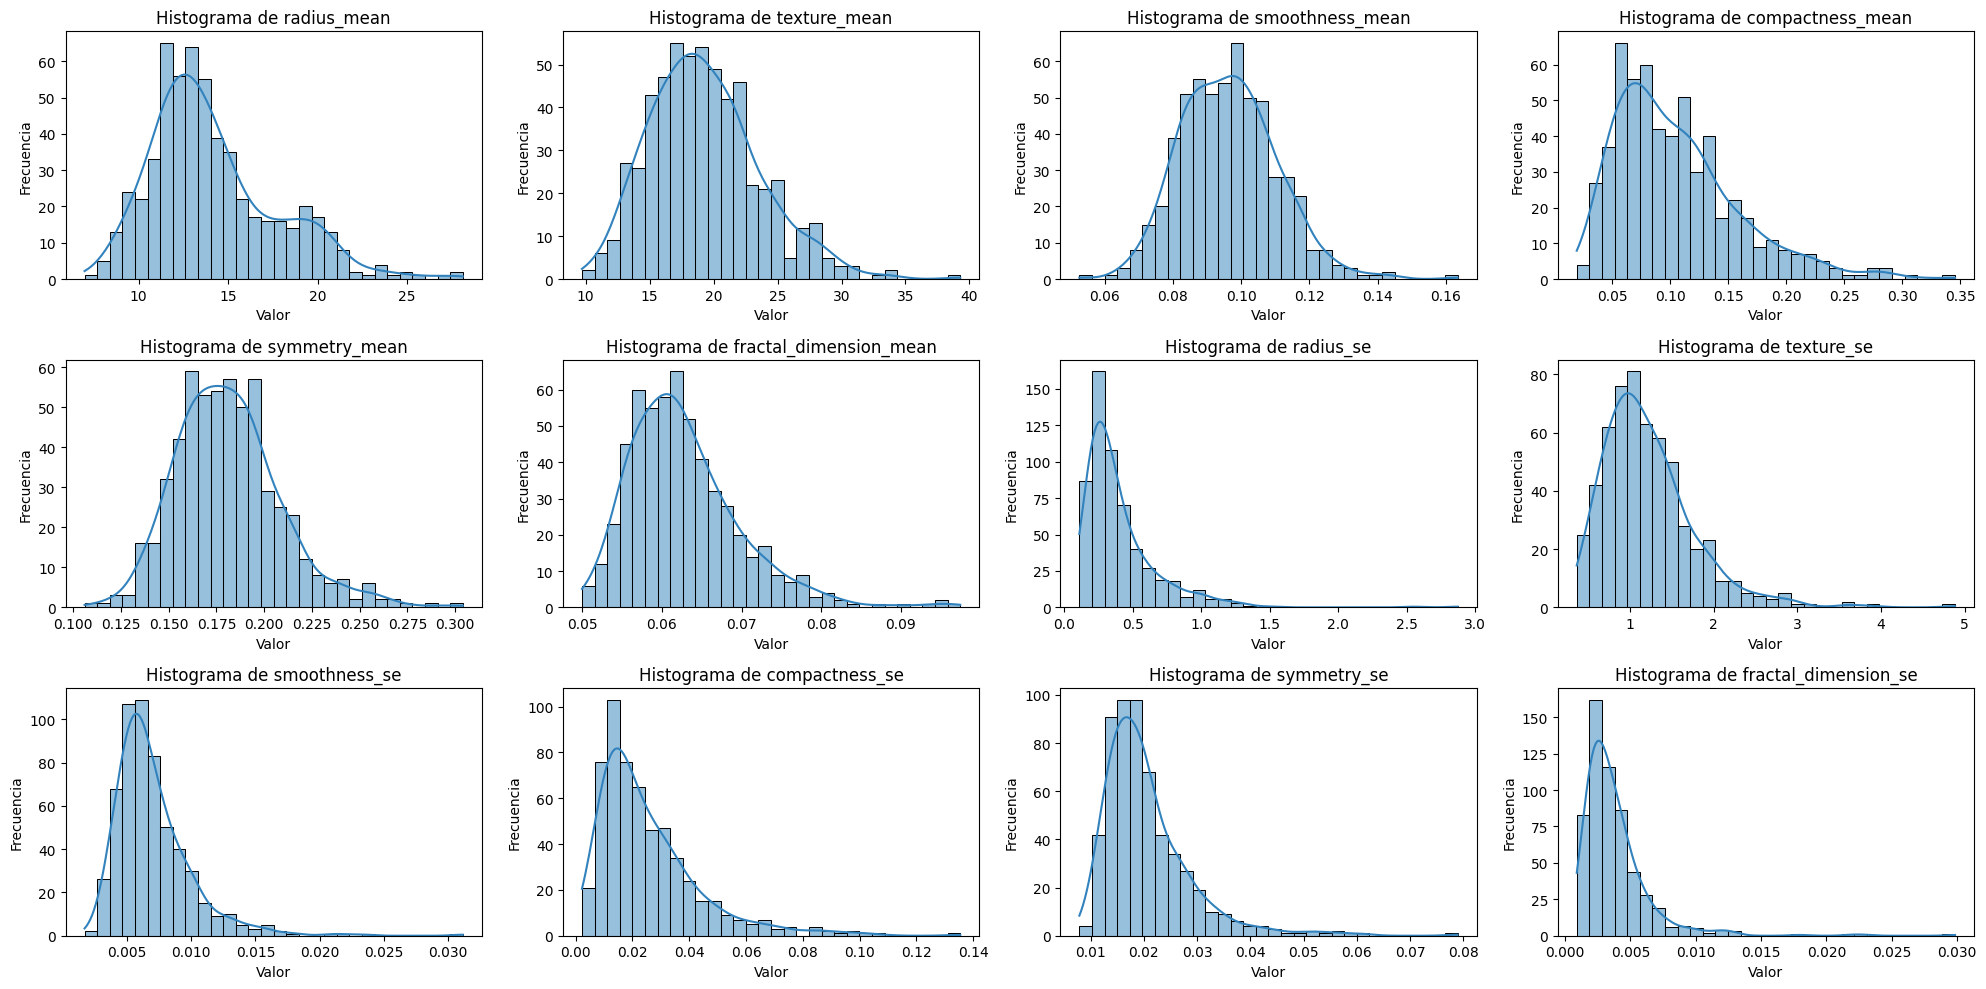

In [101]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_data_2):
    plt.subplot(3, 4, i + 1)

    sns.histplot(numeric_data_2[column], kde=True, bins=30, color="#3182bd", alpha=0.5)

    plt.title(f"Histograma de {column}")
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [102]:
# Filtrar columnas con sesgo positivo mayor a 1
skew_cols = skew_values[skew_values > 1].index.tolist()
print("Columnas con sesgo mayor a 1:", skew_cols)

Columnas con sesgo mayor a 1: ['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


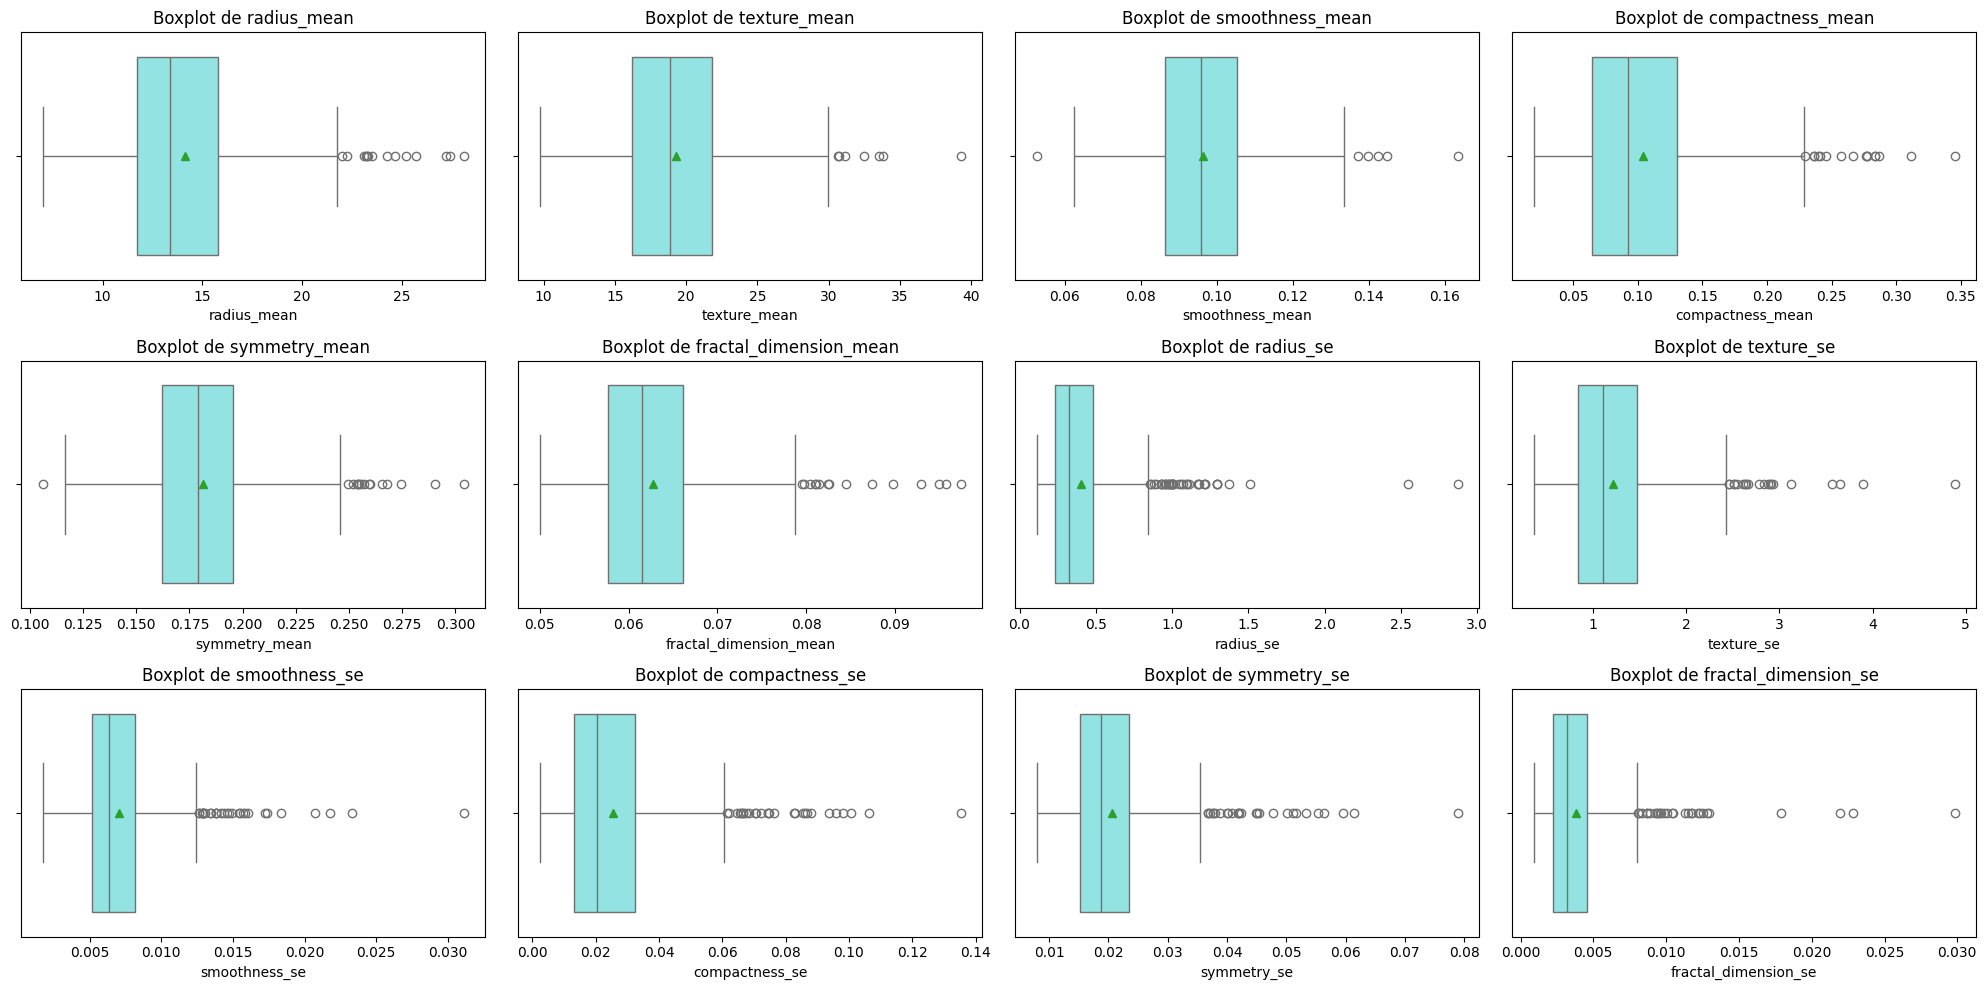

In [103]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_data_2):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=numeric_data_2[column], showmeans=True, color="#84F1EE")
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [104]:
scale_cols = [column for column in numeric_data_2 if numeric_data_2[column].min() < 0 or numeric_data_2[column].max() > 1]

print("Columnas que no están en el intervalo [0,1]:", scale_cols)

Columnas que no están en el intervalo [0,1]: ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [128]:
data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)

In [129]:
X = data_df.drop('diagnosis', axis=1)
y = data_df['diagnosis']

In [130]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [141]:
# Librerías para preprocesamiento e ing de características
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Librerías para la canalización
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

# Librerías para la regresión
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [132]:
columns_to_drop = [
    'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
    'perimeter_se', 'area_se', 'concavity_se', 'concave points_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

preprocessing = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop)
    ],
    remainder='passthrough'
)

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [133]:
ytrain = ytrain.map({'B': 0, 'M': 1})
ytest = ytest.map({'B': 0, 'M': 1})

In [134]:
logr_model = make_pipeline(preprocessing, LogisticRegression())
logr_model.fit(Xtrain, ytrain)
predictions = logr_model.predict(Xtest)

In [135]:
print("\nMatriz de Confusión:")
print(confusion_matrix(ytest, predictions))
print("---------------------------------------------")
print("\nAccuracy (exactitud):", accuracy_score(ytest, predictions))
print("\nRecall (sensibilidad):", recall_score(ytest, predictions))
print("\nPrecision (precisión):", precision_score(ytest, predictions))
print("---------------------------------------------")
print("\nClassification Report:")
print(classification_report(ytest, predictions))


Matriz de Confusión:
[[68  4]
 [10 32]]
---------------------------------------------

Accuracy (exactitud): 0.8771929824561403

Recall (sensibilidad): 0.7619047619047619

Precision (precisión): 0.8888888888888888
---------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        72
           1       0.89      0.76      0.82        42

    accuracy                           0.88       114
   macro avg       0.88      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114



Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [136]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

preprocessing2 = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),  # Eliminar las columnas correlacionadas
        ('sqrt_transform', sqrt_transformer, skew_cols),  # Aplicar raíz cuadrada a los sesgados
        ('scaler', MinMaxScaler(), scale_cols)  # Aplicar MinMaxScaler a las columnas con escala mayor a 1
    ],
    remainder='passthrough'
)

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [137]:
logr_model2 = make_pipeline(preprocessing2, LogisticRegression())
logr_model2.fit(Xtrain, ytrain)

predictions = logr_model2.predict(Xtest)

In [138]:
print("\nMatriz de Confusión:")
print(confusion_matrix(ytest, predictions))
print("---------------------------------------------")
print("\nAccuracy (exactitud):", accuracy_score(ytest, predictions))
print("\nRecall (sensibilidad):", recall_score(ytest, predictions))
print("\nPrecision (precisión):", precision_score(ytest, predictions))
print("---------------------------------------------")
print("\nClassification Report:")
print(classification_report(ytest, predictions))


Matriz de Confusión:
[[72  0]
 [11 31]]
---------------------------------------------

Accuracy (exactitud): 0.9035087719298246

Recall (sensibilidad): 0.7380952380952381

Precision (precisión): 1.0
---------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        72
           1       1.00      0.74      0.85        42

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [147]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [148]:
pca = PCA()
x_projected = pca.fit_transform(X_scaled)
x_projected_df = pd.DataFrame(x_projected)

In [151]:
# Determinar el número mínimo de componentes que explican el 99% de la varianza
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.searchsorted(cumulative_variance, 0.99) + 1
print(f"Número de componentes que explican el 99% de la varianza: {num_components}")

Número de componentes que explican el 99% de la varianza: 17


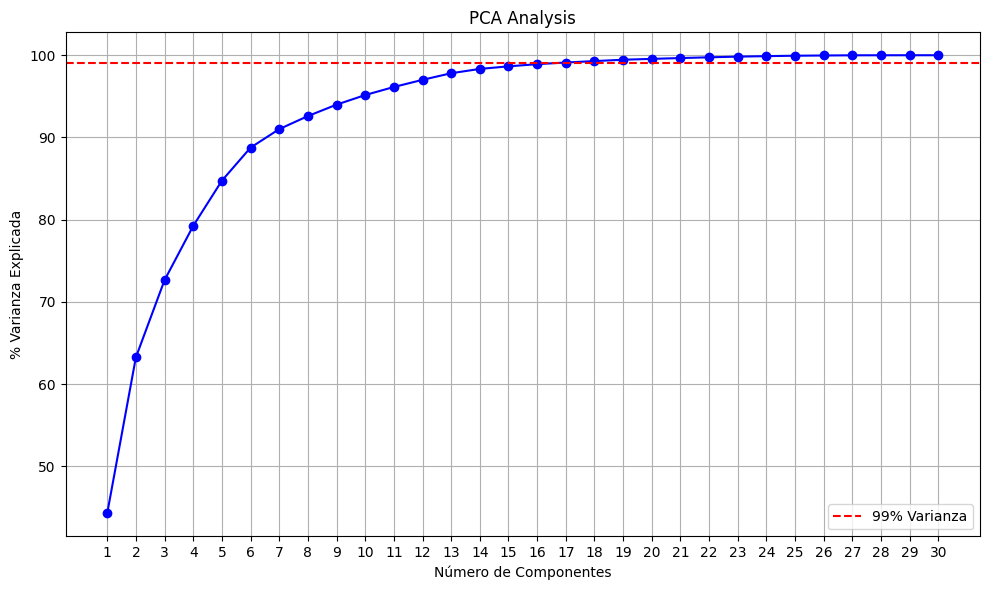

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', color='blue')
plt.axhline(y=99, color='r', linestyle='--', label='99% Varianza')
plt.title("PCA Analysis")
plt.xlabel("Número de Componentes")
plt.ylabel("% Varianza Explicada")
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [153]:
logr_model3 = make_pipeline(
    StandardScaler(),  # Escalamiento de las variables
    PCA(n_components=17),  # PCA con el número de componentes determinado
    LogisticRegression()  # Regresión logística
)

In [154]:
logr_model3.fit(Xtrain, ytrain)

predictions = logr_model3.predict(Xtest)

In [155]:
print("\nMatriz de Confusión:")
print(confusion_matrix(ytest, predictions))
print("---------------------------------------------")
print("\nAccuracy (exactitud):", accuracy_score(ytest, predictions))
print("\nRecall (sensibilidad):", recall_score(ytest, predictions))
print("\nPrecision (precisión):", precision_score(ytest, predictions))
print("---------------------------------------------")
print("\nClassification Report:")
print(classification_report(ytest, predictions))


Matriz de Confusión:
[[72  0]
 [ 2 40]]
---------------------------------------------

Accuracy (exactitud): 0.9824561403508771

Recall (sensibilidad): 0.9523809523809523

Precision (precisión): 1.0
---------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

En un modelo de diagnóstico médico, la métrica más importante sería el **recall**, maximizado a costa de reducir la precisión.

Esto se debe a que se busca identificar tantos casos positivos como sea posible, incluso si eso lleva a algunos falsos positivos. Un falso positivo, es decir, un paciente diagnosticado como positivo pero que realmente no lo era, es preferible ya que se puede corregir el diagnóstico más adelante. En cambio, un falso negativo, es decir, un diagnóstico que dimos como negativo y realmente era positivo, sería mucho más grave, ya que involucraría que un paciente con una enfermedad pensara que no la tenía, y no recibiría atención a tiempo, lo cual podría ser vital.

Por último, para maximizar el recall, se deberá **disminuir el threshold**. Esto hará que el modelo sea más sensible y clasifique a más pacientes como positivos. Para evitar llevar la precisión al mínimo, un punto óptimo sería cuando se cruza **recall** y **precision**, buscando un equilibrio entre ambos.
